In [1]:
import pandas as pd 
import numpy as np 
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
young = pd.read_csv(r"C:\Users\Sanjay Sane\Cases of Factor Analysis\Young People\responses.csv")
young.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
young.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

In [4]:
young = young.select_dtypes(include='number')
young.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Shopping centres', 'Branded clothing', 'Entertainment spending',
       'Spending on looks', 'Spending on gadgets',
       'Spending on healthy eating', 'Age', 'Height', 'Weight',
       'Number of siblings'],
      dtype='object', length=139)

In [5]:
young.drop(['Number of friends','Age', 'Height', 'Weight', 'Number of siblings'], 
          axis=1, inplace=True)
young.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Interests or hobbies', 'Parents' advice', 'Questionnaires or polls',
       'Finances', 'Shopping centres', 'Branded clothing',
       'Entertainment spending', 'Spending on looks', 'Spending on gadgets',
       'Spending on healthy eating'],
      dtype='object', length=134)

In [6]:
young.shape

(1010, 134)

In [7]:
young.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,3.0,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,5.0,3.0,1.0,2.0,4.0,1.0,4.0,3.0,4,2.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,NaN,2.0,4.0,2.0,4.0,3.0,3.0,4.0,4,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,2,4.0


In [8]:
young.isnull().sum().sum()

518

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imp_young = imputer.fit_transform(young)
imp_young.shape

(1010, 134)

In [10]:
imp_young = pd.DataFrame(imp_young, columns=young.columns)
imp_young.isnull().sum().sum()

0

# Bartlett's Test of Adequacy

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(imp_young)
chi_square_value, p_value 

(43995.65750993663, 0.0)

# KMO

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(imp_young)
kmo_model 

0.8155789578299125

In [13]:
fa = FactorAnalyzer()
fa.fit(imp_young)

FactorAnalyzer(rotation_kwargs={})

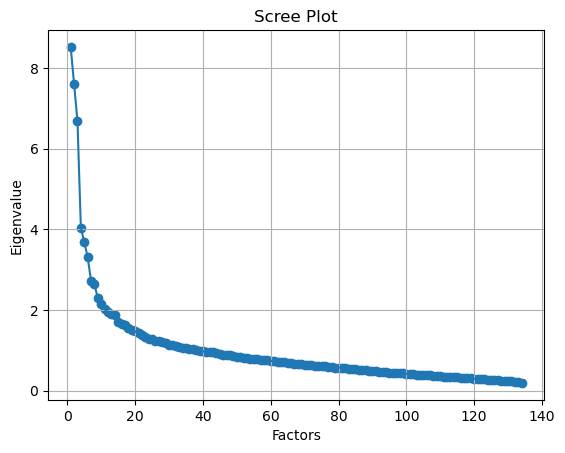

In [14]:
eigen_values, vectors = fa.get_eigenvalues()

# Scree plot of eigen values
plt.scatter(range(1,imp_young.shape[1]+1),eigen_values)
plt.plot(range(1,imp_young.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


# 15 Factors

In [15]:
fa = FactorAnalyzer()
fa.set_params(n_factors=15, rotation='varimax')
fa.fit(imp_young)
loadings = fa.loadings_
factor_df=pd.DataFrame(loadings,index=imp_young.columns)
fc_cols = ['Factor'+str(i) for i in range(1, 16)]
factor_df.columns = fc_cols
factor_df

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Music,0.017112,0.020262,-0.012748,0.087060,0.037652,0.047929,0.180126,0.123681,-0.025620,-0.013818,0.210802,0.069259,0.011912,0.193062,-0.063819
Slow songs or fast songs,0.125768,-0.017440,-0.221045,-0.010565,-0.065871,-0.028394,0.039190,0.136875,-0.012402,0.046603,0.004189,0.160514,0.007934,-0.007210,0.071027
Dance,0.117727,0.086392,-0.033291,0.100602,0.024461,-0.033137,-0.109782,0.112184,-0.039203,0.056639,0.077187,0.594130,0.097593,0.031078,0.032707
Folk,0.009262,0.070933,0.469925,-0.167241,0.066763,-0.030288,0.069583,0.101515,0.024402,0.035007,0.008288,0.085104,0.275495,-0.145639,-0.041500
Country,0.166594,-0.003944,0.410861,-0.086436,0.053773,-0.082008,0.151245,-0.084673,0.020617,-0.030939,-0.079254,0.139112,0.152914,-0.147200,0.051023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Branded clothing,0.139725,-0.033355,-0.135064,0.563435,-0.015720,-0.061918,-0.048265,0.037468,0.080369,-0.027684,-0.043835,-0.013491,0.030480,-0.061271,0.051139
Entertainment spending,0.077347,-0.093893,-0.127087,0.448314,-0.182878,-0.053340,0.190089,0.230448,0.046777,-0.047390,-0.016296,-0.003470,0.021730,-0.075489,-0.021288
Spending on looks,-0.066436,0.118277,-0.068489,0.728933,-0.019888,-0.033227,-0.031685,0.067420,0.069070,-0.006231,0.063717,0.105638,0.020537,0.029638,0.089022
Spending on gadgets,0.376229,-0.125900,-0.092246,0.434472,0.036351,0.008463,0.037497,0.096607,0.001708,-0.044179,-0.042105,-0.012486,-0.074343,0.025711,0.091007


In [16]:
fact1_cols = list(factor_df[factor_df['Factor1']>0.6].index)
fact2_cols = list(factor_df[factor_df['Factor2']>0.6].index)
fact3_cols = list(factor_df[factor_df['Factor3']>0.6].index)
fact4_cols = list(factor_df[factor_df['Factor4']>0.6].index)
fact5_cols = list(factor_df[factor_df['Factor5']>0.5].index)
fact6_cols = list(factor_df[factor_df['Factor6']>0.5].index)
fact7_cols = list(factor_df[factor_df['Factor7']>0.5].index)
fact8_cols = list(factor_df[factor_df['Factor8']>0.5].index)
fact9_cols = list(factor_df[factor_df['Factor9']>0.5].index)
fact10_cols = list(factor_df[factor_df['Factor10']>0.5].index)
fact11_cols = list(factor_df[factor_df['Factor11']>0.5].index)
fact12_cols = list(factor_df[factor_df['Factor12']>0.5].index)
fact13_cols = list(factor_df[factor_df['Factor13']>0.5].index)
fact14_cols = list(factor_df[factor_df['Factor14']>0.5].index)
fact15_cols = list(factor_df[factor_df['Factor15']>0.6].index)

In [17]:
print("Factor 1:", fact1_cols)
print("Factor 2:", fact2_cols)
print("Factor 3:", fact3_cols)
print("Factor 4:", fact4_cols)
print("Factor 5:", fact5_cols)
print("Factor 6:", fact6_cols)
print("Factor 7:", fact7_cols)
print("Factor 8:", fact8_cols)
print("Factor 9:", fact9_cols)
print("Factor 10:", fact10_cols)
print("Factor 11:", fact11_cols)
print("Factor 12:", fact12_cols)
print("Factor 13:", fact13_cols)
print("Factor 14:", fact14_cols)
print("Factor 15:", fact15_cols)

Factor 1: ['PC']
Factor 2: ['Snakes', 'Rats']
Factor 3: ['Classical music', 'Opera']
Factor 4: ['Spending on looks']
Factor 5: ['Prioritising workload', 'Workaholism', 'Thinking ahead']
Factor 6: ['Loneliness', 'Changing the past', 'Mood swings']
Factor 7: ['Rock', 'Metal or Hardrock', 'Punk', 'Rock n roll', 'Alternative']
Factor 8: ['Energy levels', 'Interests or hobbies']
Factor 9: ['History', 'Politics', 'Law']
Factor 10: ['Biology', 'Chemistry', 'Medicine']
Factor 11: ['Fantasy/Fairy tales', 'Animated']
Factor 12: ['Dance', 'Pop']
Factor 13: ['Religion', 'Final judgement', 'God']
Factor 14: []
Factor 15: []


In [18]:
questions = pd.read_csv(r"C:\Users\Sanjay Sane\Cases of Factor Analysis\Young People\columns.csv",
                        index_col=1)
questions.index

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', name='short', length=150)

### Factor 1:  Computer Liking

In [19]:
questions.loc[fact1_cols]

,original
short,
PC,"PC Software, Hardware"


### Factor 2: Brave

In [20]:
questions.loc[fact2_cols]

,original
short,
Snakes,Snakes
Rats,"Rats, mice"


### Factor 3: Music Lover

In [21]:
questions.loc[fact3_cols]

,original
short,
Classical music,Classical
Opera,Opera


### Factor 4:  Spending on Looks

In [22]:
questions.loc[fact4_cols]

,original
short,
Spending on looks,I spend a lot of money on my appearance.


### Factor 5: Hard Working

In [23]:
questions.loc[fact5_cols]

,original
short,
Prioritising workload,I try to do tasks as soon as possible and not ...
Workaholism,I often study or work even in my spare time.
Thinking ahead,I look at things from all different angles bef...


### Factor 6:  Psychic Problem

In [24]:
questions.loc[fact6_cols]

,original
short,
Loneliness,I feel lonely in life.
Changing the past,I wish I could change the past because of the ...
Mood swings,My moods change quickly.


### Factor 7:  Rock & Metal Music

In [25]:
questions.loc[fact7_cols]

,original
short,
Rock,Rock
Metal or Hardrock,"Metal, Hard rock"
Punk,Punk
Rock n roll,Rock n Roll
Alternative,Alternative music


### Factor 8:  Energic

In [26]:
questions.loc[fact8_cols]

,original
short,
Energy levels,I am always full of life and energy.
Interests or hobbies,I have many different hobbies and interests.


### Factor 9:  Humanities

In [27]:
questions.loc[fact9_cols]

,original
short,
History,History
Politics,Politics
Law,Law


### Factor 10:  Biologist

In [28]:
questions.loc[fact10_cols]

,original
short,
Biology,Biology
Chemistry,Chemistry
Medicine,Medicine


### Factor 11:  Animation Films

In [29]:
questions.loc[fact11_cols]

,original
short,
Fantasy/Fairy tales,Tales
Animated,Cartoons


### Factor 12:  Dance with Music

In [30]:
questions.loc[fact12_cols]

,original
short,
Dance,"Dance, Disco, Funk"
Pop,Pop


### Factor 13:  Religious

In [31]:
questions.loc[fact13_cols]

,original
short,
Religion,Religion
Final judgement,I believe that bad people will suffer one day ...
God,I believe in God.
